In [1]:
!pip install ReportLab
!pip install Bio

  Obtaining dependency information for ReportLab from https://files.pythonhosted.org/packages/7e/4b/f1d01a4e2712310ebb4715d38d01c5c72ce0fe27cc4540b9c1fd54a6d1df/reportlab-4.0.6-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 12.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.4/276.4 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 35.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 2.6 MB/s eta 0:00:00


In [3]:
# Show plots as part of the notebook
%matplotlib inline

# Show images inline
from IPython.display import Image

# Standard library packages
import io
import os
import re

# Import Biopython modules to interact with KEGG
from Bio import SeqIO
from Bio.KEGG import REST
from Bio.KEGG.KGML import KGML_parser
from Bio.Graphics.KGML_vis import KGMLCanvas

# Import Pandas, so we can use dataframes
import pandas as pd

In [3]:
# A bit of code that will help us display the PDF output
def PDF(filename):
    return HTML('<iframe src=%s width=700 height=350></iframe>' % filename)

# Some code to return a Pandas dataframe, given tabular text
def to_df(result):
    return pd.read_table(io.StringIO(result), header=None)

In [9]:
text = REST.kegg_info("kegg").read()

In [5]:
%time
result = REST.kegg_get("ksk:KSE_17560+ece:Z5100").read()
print(result)

CPU times: user 6 µs, sys: 9 µs, total: 15 µs
Wall time: 29.1 µs
ENTRY       KSE_17560         CDS       T01648
SYMBOL      dxs1
NAME        (GenBank) putative 1-deoxy-D-xylulose-5-phosphate synthase
ORTHOLOGY   K01662  1-deoxy-D-xylulose-5-phosphate synthase [EC:2.2.1.7]
ORGANISM    ksk  Kitasatospora setae
PATHWAY     ksk00730  Thiamine metabolism
            ksk00900  Terpenoid backbone biosynthesis
            ksk01100  Metabolic pathways
            ksk01110  Biosynthesis of secondary metabolites
MODULE      ksk_M00096  C5 isoprenoid biosynthesis, non-mevalonate pathway
BRITE       KEGG Orthology (KO) [BR:ksk00001]
             09100 Metabolism
              09108 Metabolism of cofactors and vitamins
               00730 Thiamine metabolism
                KSE_17560 (dxs1)
              09109 Metabolism of terpenoids and polyketides
               00900 Terpenoid backbone biosynthesis
                KSE_17560 (dxs1)
            Enzymes [BR:ksk01000]
             2. Transferases
 

In [14]:
k0_match = re.search(r'ORTHOLOGY\s+(\S+)', result)
ntseq_match = re.search(r'NTSEQ\s+(\d+)\s+([\s\S]+?)(?=\S+\s|$)', result)

if k0_match:
    k0_value = k0_match.group(1)
    print(f"K0: {k0_value}")

if ntseq_match:
    ntseq_length = ntseq_match.group(1)
    ntseq_value = ntseq_match.group(2).replace('\n', '').replace(' ', '')
    print(f"NTSEQ Length: {ntseq_length}")
    print(f"NTSEQ Value: {ntseq_value}")

K0: K01662
NTSEQ Length: 1926
NTSEQ Value: a


In [16]:
k0_match

<re.Match object; span=(135, 153), match='ORTHOLOGY   K01662'>

In [12]:
to_df(result)

,0
0,ENTRY KSE_17560 CDS T01648
1,SYMBOL dxs1
2,NAME (GenBank) putative 1-deoxy-D-xylul...
3,ORTHOLOGY K01662 1-deoxy-D-xylulose-5-phosp...
4,ORGANISM ksk Kitasatospora setae
...,...
71,accccgctgcgcgacctcggcgtcccgcaggagt...
72,atcctggaggagatcggactcaccggcaccggcg...
73,cgccgcctgctgcccggcacccggagcggcgccc...
74,aagtag


In [11]:
result = REST.kegg_info("kegg").read()

# Print the result
print(result)

kegg             Kyoto Encyclopedia of Genes and Genomes
kegg             Release 108.0+/09-29, Sep 23
                 Kanehisa Laboratories
                 pathway   1,086,943 entries
                 brite       364,194 entries
                 module          559 entries
                 orthology    26,248 entries
                 genome       24,096 entries
                 genes     50,241,942 entries
                 compound     19,136 entries
                 glycan       11,222 entries
                 reaction     11,965 entries
                 rclass        3,194 entries
                 enzyme        8,077 entries
                 network       1,514 entries
                 variant       1,212 entries
                 disease       2,653 entries
                 drug         12,228 entries
                 dgroup        2,436 entries



In [12]:
# Find a specific entry with a precise search term
result = REST.kegg_find("genes", "KSE_17560").read()
to_df(result)

,0,1
0,ksk:KSE_17560,dxs1; putative 1-deoxy-D-xylulose-5-phosphate ...


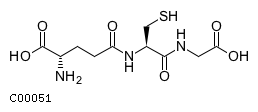

In [13]:
# Display molecular structure for cpd:C00051
result = REST.kegg_get("cpd:C00051", "image").read()
Image(result)

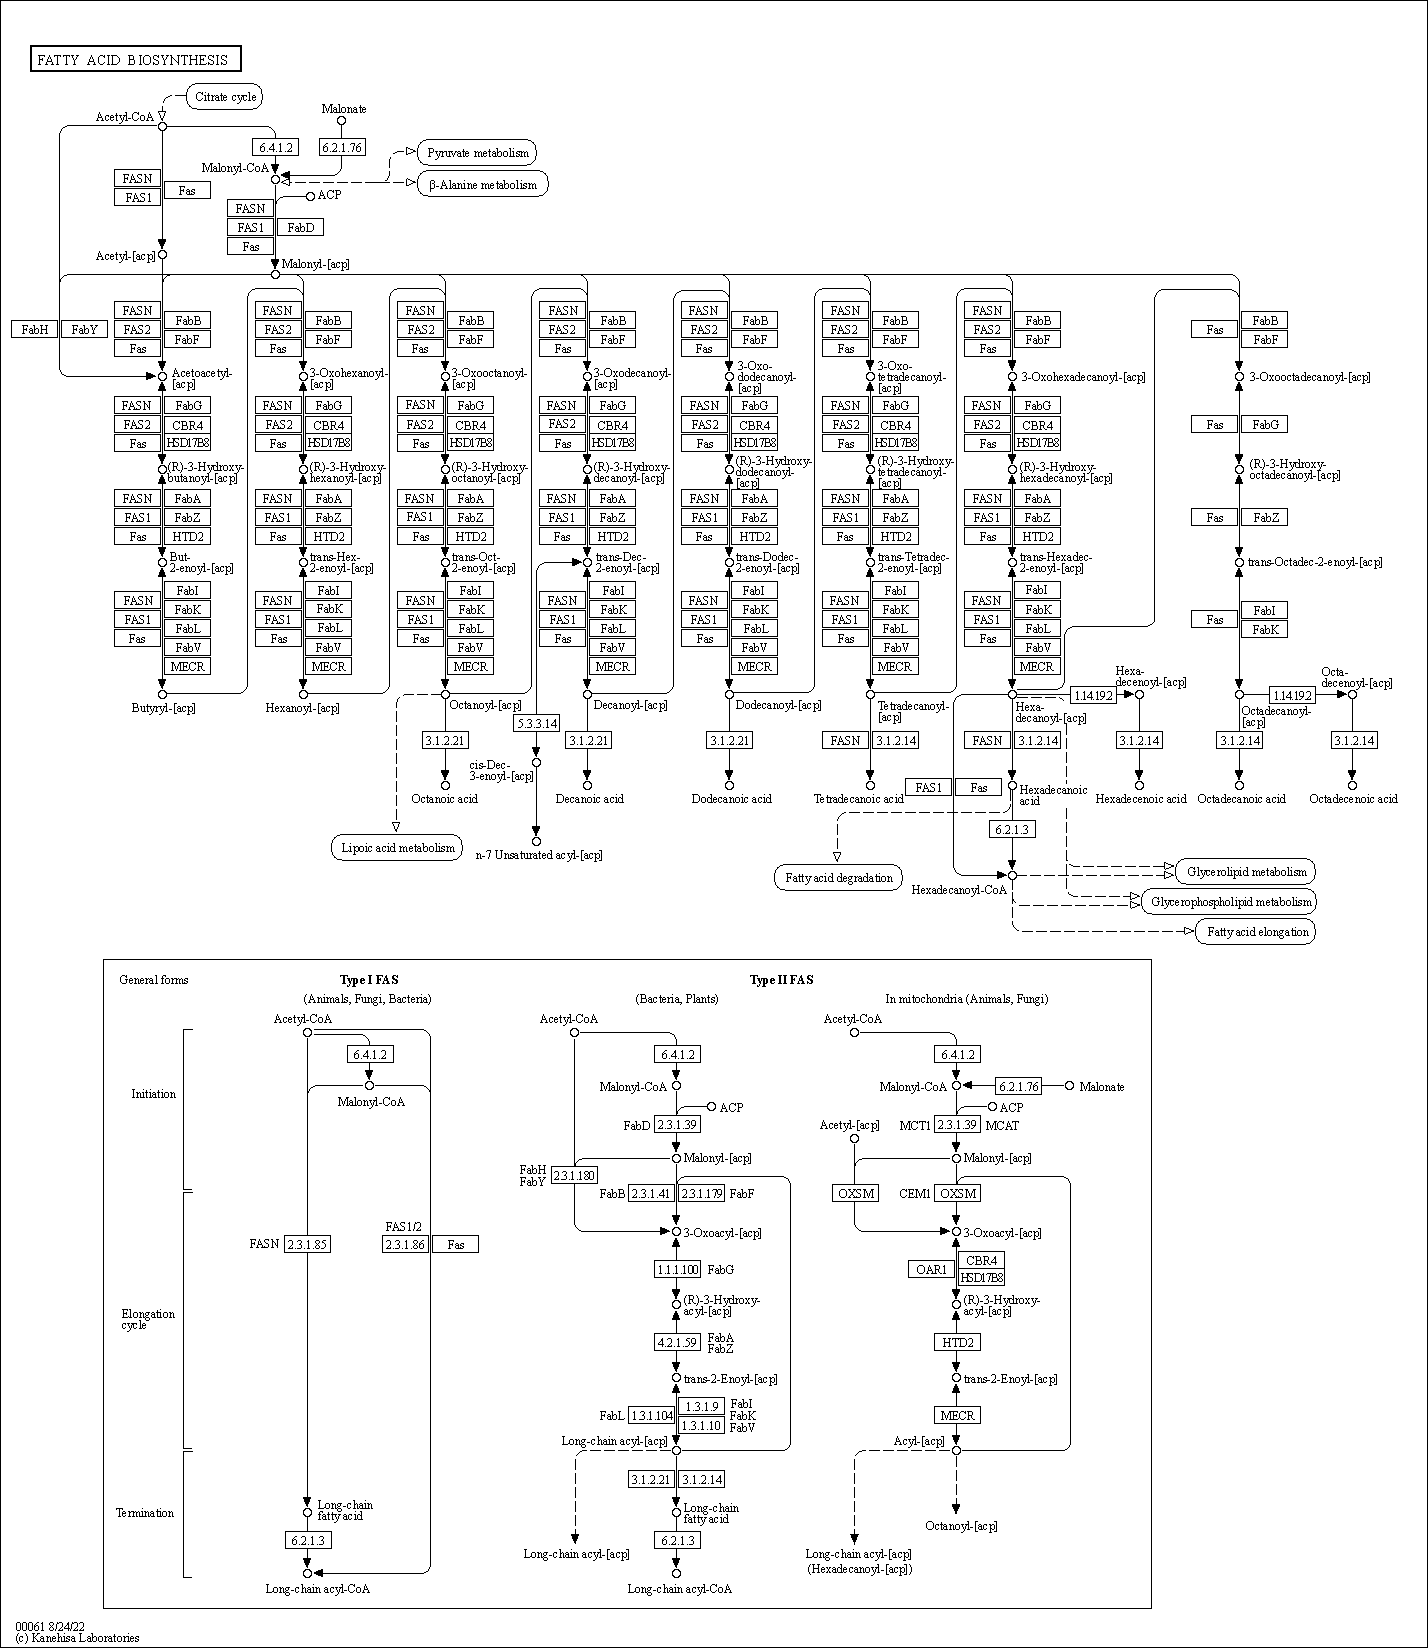

In [14]:
# Get map of fatty-acid biosynthesis
result = REST.kegg_get("map00061", "image").read()
Image(result)